In [1]:
import pandas as pd
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

In [2]:
cleaned = pd.read_csv('datasets/cleaned_Izends_Data_Thru201712_ver5.csv',index_col=0)

/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loss_des = cleaned['LossDescription']

In [4]:
loss_des

2                                        This is a test job.
12         Fire started in master bedroom. Spoke with hom...
20         PH was cooking and she thought she turned the ...
21         Tree fell on house. Insulation is over clothes...
25         Fire is due to candle in upstairs bonus room a...
26            H/o preferred that brother is there to assist.
28         Fire loss. Appears the downstairs was a total ...
31         Few textiles in the bedroom closets/dressers etc 
32         Remove all textiles insured has enormous stuff...
34         Tree fell on house it appears that most textil...
35         1035 sqft house  2 bed/1 bath  81 years old. T...
36         1 200 sqft house  single story  kitchen fire  ...
37         Fire started in garage  spread up the side of ...
39         Vacation home hit by a tornado. Textiles are i...
40                                  Adjuster will be onsite.
42                  Rental insurance for personal property. 
44         Grease fire/k

# Cleaning

In [5]:
# For beginning, transform to lowercase using text.lower()
loss_des = loss_des.str.lower()

In [6]:
# Then replace everything except the letters and numbers in the spaces.
# it will facilitate the further division of the text into words.
loss_des = loss_des.replace('[^a-zA-Z0-9]', ' ', regex = True)

In [7]:
def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text
loss_des = np.vectorize(remove_num)(loss_des)

In [8]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
def remove_stopwords(text):
    word_list = [i for i in word_tokenize(text.lower()) if i not in stop]
    text = ' '.join(word_list)
    return text
loss_des = np.vectorize(remove_stopwords)(loss_des)

In [9]:
from string import punctuation

def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text
loss_des = np.vectorize(remove_punct)(loss_des)

def remove_u(text):
    text = text.replace('_','')
    return text
loss_des = np.vectorize(remove_u)(loss_des)

In [10]:
import itertools
def remove_iter(text):
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    return text
loss_des = np.vectorize(remove_iter)(loss_des)

In [11]:
def remove_extra_space(text):
    word_list = text.split()
    text = ' '.join(word_list)
    return text
loss_des = np.vectorize(remove_extra_space)(loss_des)

In [12]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [13]:
import re
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
loss_des = np.vectorize(expand_contractions)(loss_des)

# Stemming and Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    word_list = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    text= ' '.join(word_list)
    return text
loss_des = np.vectorize(lemmatize_text)(loss_des)

In [15]:
loss_des

array(['test job',
       'fire started master bedroom spoke homeowner call back setup pack',
       'ph cooking thought turned stove actually turned burner high', ...,
       'call came today mr carrico installing something ceiling drilled',
       'water escape', 'toilet'], dtype='<U100')

In [16]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stem_text(text):
    processed_tokens = []
    tokens = nltk.word_tokenize(text)
    porter = nltk.PorterStemmer()
    for t in tokens:
        t = porter.stem(t)
        processed_tokens.append(t)
    text = " ".join(processed_tokens)
    return text
loss_des = np.vectorize(stem_text)(loss_des)

In [17]:
loss_des

array(['test job',
       'fire start master bedroom spoke homeown call back setup pack',
       'ph cook thought turn stove actual turn burner high', ...,
       'call came today mr carrico instal someth ceil drill',
       'water escap', 'toilet'], dtype='<U96')

In [18]:
loss_des_df = pd.DataFrame()

In [19]:
cleaned.columns

Index(['DisplayName', 'DivisionName', 'City', 'Zip', 'State', 'LossYearMo',
       'StartedFlag', 'CommOrRes', 'NoteCount', 'PhotoCount', 'JobCount',
       'ClaimCount', 'EstimateTotal', 'PolicyHolderType', 'LossDescription',
       'Estimate_NetClaim', 'Estimate_MaterialSaleTax', 'Estimate_OverHead',
       'Estimate_Profit', 'Estimate_PctOverhead', 'Estimate_PctProfit',
       'Estimate_Deductible', 'Estimate_BaseSvcCharge',
       'CleanAddressFranchisorID', 'CleanAddressContactID', 'LossMo'],
      dtype='object')

In [20]:
loss_des_df['EstimateTotal'] = cleaned['EstimateTotal']

In [21]:
loss_des_df['LossDescription'] = loss_des

# Drop rows with empty Loss Description

In [178]:
loss_des_df = loss_des_df[loss_des_df['LossDescription'] != '']

# Drop rare words

In [166]:
from collections import Counter

In [185]:
counts = (Counter(" ".join(loss_des_df['LossDescription']).split(" ")))

In [187]:
counts_df= pd.DataFrame.from_dict(counts, orient='index').reset_index()

In [189]:
counts_df.columns= ['word','count']

In [192]:
counts_df.sort_values(by='count',ascending=False,inplace=True)

In [204]:
words_to_remove = list(counts_df[counts_df['count'] < 7]['word'])

In [220]:
words_to_remove_reg_ex = r'\b(?:{})\b'.format('|'.join(words_to_remove))

In [231]:
%%time
loss_des_df['LossDescription'] = loss_des_df['LossDescription'].str.replace(words_to_remove_reg_ex,'')

CPU times: user 25min 24s, sys: 57.7 ms, total: 25min 24s
Wall time: 25min 24s


/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### New counts

In [235]:
Counter(" ".join(loss_des_df['LossDescription']).split(" "))

Counter({'': 69644,
         'blackwel': 7,
         'paulett': 8,
         'refd': 451,
         'tw': 37,
         'jewleri': 7,
         'chosen': 11,
         'gore': 26,
         'srg': 10,
         'fume': 30,
         'huge': 256,
         'rachael': 26,
         'reconnect': 23,
         'mendoza': 13,
         'accid': 356,
         'theif': 11,
         'baptistri': 7,
         'vacuum': 275,
         'reliev': 12,
         'ab': 213,
         'herbi': 10,
         'brightserv': 72,
         'pv': 16,
         'becker': 12,
         'china': 57,
         'verizon': 20,
         'jane': 84,
         'filler': 28,
         'secondari': 255,
         'piller': 9,
         'team': 296,
         'restoreco': 22,
         'renaiss': 26,
         'dust': 501,
         'refus': 45,
         'kincaid': 7,
         'mccormick': 16,
         'gyproc': 12,
         'blaze': 9,
         'blackwood': 8,
         'shingel': 11,
         'teak': 7,
         'chainlink': 10,
         'prio': 

In [240]:
# Removing rows where loss desc is empty
loss_des_df = loss_des_df[loss_des_df['LossDescription'] != '']

In [255]:
# Remove extra spaces
loss_des_df['LossDescription'] = np.vectorize(remove_extra_space)(loss_des_df['LossDescription'])

/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [260]:
# Strip text
loss_des_df['LossDescription'] = loss_des_df['LossDescription'].str.strip()

/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [287]:
len(Counter(" ".join(loss_des_df['LossDescription']).split()))

11024

In [264]:
loss_des_df['LossDescription'].shape

(766423,)

----

# Getting most frequent words

In [265]:
from sklearn.feature_extraction.text import CountVectorizer

In [311]:
vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")

In [312]:
corpus = loss_des_df['LossDescription']

In [313]:
sparse_matrix = vectorizer.fit_transform(corpus)

In [314]:
len(vectorizer.vocabulary_)

11024

In [315]:
features_count = sparse_matrix.sum(axis=0).tolist()[0]
features_names = vectorizer.get_feature_names()

In [316]:
features = pd.DataFrame()

In [317]:
features['feature'] = features_names

In [318]:
features['count'] = features_count

In [319]:
features = features.sort_values(by='count',ascending=False)

In [321]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(features)

                 feature   count
10637              water  281834
2432               damag  177457
5599                leak  161983
3765               floor   91316
8386                roof   84013
789             basement   80645
5835                loss   79528
8394                room   75349
132               affect   63335
7397                pipe   59861
5384             kitchen   58945
4623                home   57631
5727                line   56241
820             bathroom   55942
1621                ceil   54882
6681                need   54824
1593                caus   53613
4949               insur   53596
1538              carpet   50725
3692                fire   49069
10589               wall   48140
1443                call   41545
9967              toilet   37256
886              bedroom   36105
6441                mold   35964
10280               unit   35273
689                 back   32962
4675                hous   30172
8142              repair   29809
4628      

In [325]:
features.shape

(11024, 2)

### To get unique integers for each word

In [377]:
loss_des_df['hashed_loss_desc'] = loss_des_df['LossDescription'].apply(lambda x: [vectorizer.vocabulary_.get(y) for y in x.split()])

/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Changing 0s to highest value integer

In [378]:
max([val for sublist in loss_des_df['hashed_loss_desc'] for val in sublist])

11023

### So replace all 0s by 11024

In [379]:
%%time
loss_des_df['hashed_loss_desc'] = loss_des_df['hashed_loss_desc'].apply(lambda x: list(pd.Series(x).replace(0,11024)))

CPU times: user 4min 43s, sys: 2.75 s, total: 4min 46s
Wall time: 4min 46s


/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Keras Hashing of words
#### To get unique integers for each word

In [370]:
# from keras.preprocessing.text import hashing_trick

In [371]:
# def hashing(sentence,vocab_size):
#     result = hashing_trick(sentence, vocab_size, hash_function='md5')
#     return result

In [372]:
# text = loss_des_df['LossDescription']

In [373]:
# len(set(x for l in text for x in l.split()))

In [374]:
# To get vocab size
# v_size = round(47626)

In [375]:
# v_size

In [380]:
# loss_des_df['hashed_loss_desc'] = text.apply(lambda x: hashing(x,v_size))

In [381]:
# loss_des_df

In [383]:
# a = list(loss_des_df['hashed_loss_desc'])

In [384]:
# len(set(x for l in a for x in l))

# Making y-bins

In [385]:
loss_des_df['EstimateTotal_bins'] = pd.qcut(loss_des_df['EstimateTotal'],10,labels = ["a", "b", "c", "d","e","f","g","h","i","j"])

/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [386]:
loss_des_df['EstimateTotal_bins'] = loss_des_df['EstimateTotal_bins'].astype(str)

/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [387]:
loss_des_df['EstimateTotal_bins'].dtype

dtype('O')

# Padding 

### Check distribution of lengths of hashed sentences

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt

In [389]:
loss_des_df['hashed_loss_desc_len'] = loss_des_df['hashed_loss_desc'].apply(lambda x: len(x))

/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [396]:
loss_des_df = loss_des_df[loss_des_df['hashed_loss_desc_len'] != 0]

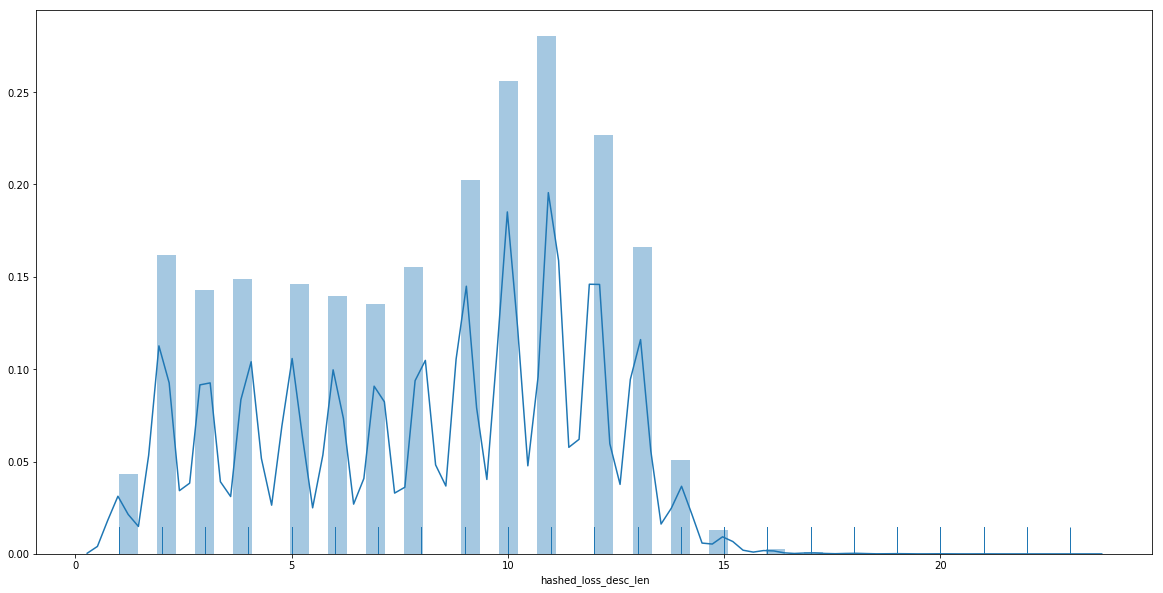

In [397]:
plt.figure(figsize=(20,10))
sns.distplot(loss_des_df['hashed_loss_desc_len'],hist=True,rug=True)
plt.show()

##### So, taking the padding length to be 14

In [398]:
pad_length= 14

In [399]:
from keras.preprocessing import sequence

In [400]:
loss_des_df['hashed_loss_desc_padded'] = list(sequence.pad_sequences(loss_des_df['hashed_loss_desc'],maxlen=pad_length))

/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [403]:
loss_des_df.to_csv('hashed_cleaned_loss_desc_from_5_ipynb.csv')

In [2]:
loss_des_df =  pd.read_csv('hashed_cleaned_loss_desc_from_5_ipynb.csv',index_col=0)

In [6]:
# Changing dtype of hashed_loss_desc_padded column
loss_des_df['hashed_loss_desc_padded'] = loss_des_df['hashed_loss_desc_padded'].apply(lambda x: np.fromstring(x[1:-1],dtype='int32',sep=' '))

# Splitting Data

In [9]:
loss_des_df['LossYearMo'] = cleaned['LossYearMo']

In [10]:
test2017=loss_des_df[loss_des_df["LossYearMo"].apply(lambda x:x>=201701)]

In [11]:
learning=loss_des_df[loss_des_df["LossYearMo"].apply(lambda x:x<201701)]

In [12]:
X = learning['hashed_loss_desc_padded']

In [13]:
X.head()

12    [0, 0, 0, 0, 3692, 9350, 6087, 886, 9252, 4628...
20    [0, 0, 0, 0, 0, 7331, 2165, 9874, 10167, 9452,...
21    [0, 0, 0, 0, 0, 0, 10089, 3623, 4675, 4944, 19...
25    [0, 0, 0, 0, 0, 0, 0, 3692, 3048, 1476, 10342,...
26    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4345, 7607, 128...
Name: hashed_loss_desc_padded, dtype: object

In [14]:
y = learning['EstimateTotal_bins']

In [15]:
y_dummies = pd.get_dummies(y,sparse=True)

In [16]:
y_dummies.head()

,a,b,c,d,e,f,g,h,i,j
12,0,0,0,0,0,0,1,0,0,0
20,1,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,1,0,0,0
25,0,0,0,0,0,0,0,0,1,0
26,0,1,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_dummies, test_size=0.33, random_state=42)

In [18]:
X_train.shape, y_train.shape

((335176,), (335176, 10))

In [19]:
X_val.shape, y_val.shape

((165087,), (165087, 10))

In [20]:
test2017_X = test2017['hashed_loss_desc_padded']

In [21]:
test2017_y = test2017['EstimateTotal_bins']

In [22]:
test2017_y_dummies = pd.get_dummies(test2017_y,sparse=True)

In [23]:
test2017_y_dummies.head()

,a,b,c,d,e,f,g,h,i,j
2,0,0,0,0,0,0,1,0,0,0
59,0,0,0,0,0,0,0,1,0,0
663,0,0,0,0,1,0,0,0,0,0
664,0,0,0,0,0,0,0,1,0,0
667,0,0,0,0,0,1,0,0,0,0


# Building the LSTM Model

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [25]:
X_train_temp  = X_train
y_train_temp = y_train
X_val_temp = X_val
y_val_temp = y_val

In [26]:
X_train_temp = np.stack(X_train_temp, axis=0 )
X_val_temp = np.stack(X_val_temp, axis=0 )

In [27]:
X_train_temp.shape, y_train_temp.shape, X_val_temp.shape, y_val_temp.shape

((335176, 14), (335176, 10), (165087, 14), (165087, 10))

#### Creating the model

In [ ]:
# create the model
embedding_vecor_length = 100
model = Sequential()
model.add(Embedding(11024, embedding_vecor_length, input_length=14))
model.add(LSTM(15))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50,restore_best_weights=True)
print(model.summary())
model.fit(X_train_temp, y_train_temp.values, validation_data=(X_val_temp,y_val_temp.values), callbacks=[early_stop],epochs=500, batch_size=128,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 14, 100)           1102400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 15)                6960      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 1,109,520
Trainable params: 1,109,520
Non-trainable params: 0
_________________________________________________________________
None
Train on 335176 samples, validate on 165087 samples
Epoch 1/500
117632/335176 [=========>....................] - ETA: 31s - loss: 2.2390 - acc: 0.1548

In [ ]:
model.predict(np.stack(test2017_X.head(),axis=0))

In [ ]:
test2017_preds = model.predict_classes(np.stack(test2017_X,axis=0))

In [ ]:
test2017_final_df = pd.DataFrame()

In [ ]:
test2017_final_df['actual_y'] = test2017_y

In [ ]:
test2017_final_df['preds'] = test2017_preds

In [ ]:
test2017_final_df

In [ ]:
mapping_dict = {0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',9:'j'}

In [ ]:
test2017_final_df['new_preds'] = test2017_final_df['preds'].map(mapping_dict)

In [ ]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(test2017_final_df['actual_y'], test2017_final_df['new_preds'])

0.16321178305059272

In [44]:
model.save('sequence_classifier_500ep_50es_from_5ipynb.h5')